# Bank Customer Churn Analysis

## Objective
To analyse customer churn behaviour and identify key factors contributing to customer exit using exploratory data analysis.

## Business Context
Customer churn refers to customers leaving the bank. Understanding churn drivers helps improve customer retention and reduce revenue loss.


## Data Loading

We begin by loading the dataset and inspecting its structure.


In [1]:
import pandas as pd

df = pd.read_csv("../data/Churn_Modelling.csv")

df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.shape


(10000, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Dataset Overview

- Total rows: 10,000  
- Total columns: 14  
- No missing values detected  
- Target variable: Exited (1 = churned, 0 = retained)

The dataset is clean and ready for analysis.


## Overall Churn Rate

We calculate the proportion of customers who have exited the bank.


In [4]:
df['Exited'].value_counts()


Exited
0    7963
1    2037
Name: count, dtype: int64

In [5]:
df['Exited'].value_counts(normalize=True) * 100


Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

### Insight

Approximately 20% of customers have churned, meaning 1 in 5 customers leave the bank. This indicates a significant retention issue.


## Churn by Geography

We analyse churn distribution across different countries to identify regional risk patterns.


In [6]:
pd.crosstab(df['Geography'], df['Exited'], normalize='index') * 100


Exited,0,1
Geography,,
France,83.845233,16.154767
Germany,67.556796,32.443204
Spain,83.326605,16.673395


### Insight

Germany shows a significantly higher churn rate (~32%) compared to France and Spain (~16%). This suggests a strong regional retention concern.


## Churn by Gender

We analyse whether gender influences churn behaviour.


In [7]:
pd.crosstab(df['Gender'], df['Exited'], normalize='index') * 100


Exited,0,1
Gender,,
Female,74.928461,25.071539
Male,83.544072,16.455928


### Insight

Female customers exhibit a higher churn rate (~25%) compared to male customers (~16%). This suggests a notable gender-based retention difference.


## Age Impact on Churn

We compare the average age of customers who stayed versus those who exited.


In [8]:
df.groupby('Exited')['Age'].mean()


Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

### Insight

Customers who churned are on average approximately 7 years older than retained customers, indicating age may be a strong predictor of churn.


## Balance Impact on Churn

We analyse whether account balance influences churn behaviour.


In [9]:
df.groupby('Exited')['Balance'].mean()


Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

### Insight

Churned customers have significantly higher average balances (~91k vs ~72k), indicating the bank is losing higher-value customers.


In [10]:
pd.crosstab(df['IsActiveMember'], df['Exited'], normalize='index') * 100


Exited,0,1
IsActiveMember,,
0,73.149103,26.850897
1,85.730926,14.269074


## Impact of Customer Activity on Churn

We analysed whether being an active member influences the likelihood of churn.

### Insight

Inactive customers show a churn rate of approximately 26.9%, compared to only 14.3% for active customers. 

This clearly suggests that customer engagement plays a strong role in retention. Customers who are less active are almost twice as likely to leave the bank, indicating that improving engagement could significantly reduce churn.


In [11]:
pd.crosstab(df['NumOfProducts'], df['Exited'], normalize='index') * 100


Exited,0,1
NumOfProducts,,
1,72.285602,27.714398
2,92.418301,7.581699
3,17.293233,82.706767
4,0.000000,100.000000


## Impact of Number of Products on Churn

We analysed how the number of products held by a customer relates to churn behaviour.

### Insight

Customers holding exactly 2 products show the lowest churn rate (~7.6%), suggesting that moderate engagement leads to stronger retention.

Customers with only 1 product have a higher churn rate (~27.7%), indicating that limited engagement increases churn risk.

Interestingly, customers with 3 or 4 products show extremely high churn rates (~83% and 100%). This may indicate dissatisfaction among heavily engaged customers, or it could be due to a very small number of customers in these categories.

Overall, holding 2 products appears to be the optimal engagement level for retention.


In [12]:
df['NumOfProducts'].value_counts()


NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

### Validation of Product Categories

Most customers hold either 1 or 2 products (over 9,600 customers combined).

However, only 266 customers hold 3 products and just 60 customers hold 4 products. 

This explains the extreme churn percentages observed for 3 and 4 product categories. Due to the small sample size, these results should be interpreted with caution.


In [13]:
df.groupby('Exited')['Tenure'].mean()


Exited
0    5.033279
1    4.932744
Name: Tenure, dtype: float64

## Impact of Tenure on Churn

We compared the average tenure of retained and churned customers.

### Insight

The average tenure for retained customers (~5.03 years) and churned customers (~4.93 years) is nearly identical.

This suggests that the length of time a customer has been with the bank does not significantly influence churn behaviour in this dataset.


In [14]:
df.groupby('Exited')['CreditScore'].mean()


Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64

## Impact of Credit Score on Churn

We compared the average credit score of retained and churned customers.

### Insight

The average credit score difference between retained (~652) and churned (~645) customers is minimal.

This suggests that credit score alone does not strongly influence churn behaviour in this dataset.


In [15]:
df.groupby('Exited')['EstimatedSalary'].mean()


Exited
0     99738.391772
1    101465.677531
Name: EstimatedSalary, dtype: float64

## Impact of Estimated Salary on Churn

We compared the average estimated salary of retained and churned customers.

### Insight

The difference in average salary between retained (~99.7k) and churned (~101.5k) customers is relatively small.

This suggests that income level does not appear to be a strong standalone driver of churn in this dataset.


# Key Findings Summary

Based on the exploratory analysis, the following factors appear to significantly influence churn:

- Customers in Germany show substantially higher churn rates.
- Female customers exhibit higher churn compared to male customers.
- Older customers are more likely to churn.
- Customers with higher account balances are more likely to leave.
- Inactive customers have nearly double the churn rate of active customers.
- Holding exactly 2 products appears to improve retention significantly.

Factors that do not show strong influence on churn:

- Tenure
- Credit score
- Estimated salary

Overall, churn behaviour appears to be more strongly associated with customer engagement and demographic factors rather than financial metrics alone.


# Data Preparation for Modelling

Before building the predictive model, we remove identifier columns that do not contribute to churn prediction.


In [16]:
df_model = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

df_model.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Encoding Categorical Variables

Machine learning models require numerical input. We apply one-hot encoding to convert categorical variables (Geography and Gender) into numerical format.

We drop the first category to avoid multicollinearity.


In [17]:
df_model = pd.get_dummies(df_model, columns=['Geography', 'Gender'], drop_first=True)

df_model.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


## Finalising Feature Format

We convert boolean dummy variables into integer format (0 and 1) to ensure consistency for model training.


In [18]:
df_model = df_model.astype(int)

df_model.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


## Defining Features and Target Variable

We separate the dataset into:
- X → independent variables (customer features)
- y → target variable (Exited)


In [19]:
X = df_model.drop('Exited', axis=1)
y = df_model['Exited']

X.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,0,0,0
1,608,41,1,83807,1,0,1,112542,0,1,0
2,502,42,8,159660,3,1,0,113931,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0
4,850,43,2,125510,1,1,1,79084,0,1,0


## Train-Test Split

We split the dataset into training and testing sets.
The model will learn from the training data and be evaluated on unseen test data.


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (8000, 11)
Testing set size: (2000, 11)


## Building First Model - Logistic Regression

We start with Logistic Regression as a baseline classification model.
This helps us understand how well customer churn can be predicted using linear decision boundaries.


In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model training completed.")


Model training completed.


C:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Feature Scaling

Logistic Regression is sensitive to feature magnitude differences.
We standardize the feature values to improve model convergence and performance.


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Model retrained successfully with scaled data.")


Model retrained successfully with scaled data.


## Model Evaluation

We evaluate the Logistic Regression model using:
- Accuracy Score
- Confusion Matrix
- Classification Report


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.811

Confusion Matrix:
 [[1543   64]
 [ 314   79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



## Initial Logistic Regression Results (Baseline Model)

The baseline Logistic Regression model achieved an accuracy of 81%.

However, accuracy alone is misleading because the dataset is imbalanced 
(only ~20% of customers churn).

While the model performs very well in identifying non-churn customers 
(recall = 0.96), it struggles significantly in detecting churned customers 
(recall = 0.20).

This means the model correctly identifies only 20% of customers who actually leave the bank.

Since churn prediction is focused on identifying customers at risk of leaving,
improving recall for class 1 (Exited = 1) is critical.


## Improving Minority Class Detection

To improve the model's ability to detect churned customers,
we retrain Logistic Regression using class_weight='balanced'.

This forces the model to give more importance to the minority class.


In [25]:
model_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')

model_balanced.fit(X_train_scaled, y_train)

y_pred_balanced = model_balanced.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_balanced))


Accuracy: 0.7195

Confusion Matrix:
 [[1159  448]
 [ 113  280]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.72      0.81      1607
           1       0.38      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.75      2000



## Balanced Logistic Regression Results

After applying class_weight='balanced', the model's overall accuracy decreased 
from 81% to approximately 72%.

However, the recall for churned customers (Exited = 1) improved significantly 
from 20% to 71%.

This means the model is now correctly identifying a much larger proportion 
of customers who are at risk of leaving.

Although this comes at the cost of lower overall accuracy and more false positives,
improving churn detection is more valuable from a business perspective, 
as the primary goal is to retain customers before they leave.


## Model 2 - Random Forest

Random Forest is a non-linear ensemble model that can capture complex
relationships between features.

Unlike Logistic Regression, it does not require feature scaling
and often performs better on structured tabular data.


In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest training completed.")


Random Forest training completed.


## Random Forest Evaluation

We evaluate Random Forest using the same metrics:
- Accuracy
- Confusion Matrix
- Classification Report


In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.8695

Confusion Matrix:
 [[1553   54]
 [ 207  186]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.47      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



## Random Forest Results

Random Forest achieved the highest overall accuracy (~87%) among all models tested.

It significantly improved churn detection compared to the baseline Logistic Regression
(recall increased from 20% to 47%).

While it does not detect as many churners as the balanced Logistic Regression,
it achieves much higher precision (78%), meaning fewer false alarms.

This model provides a more balanced trade-off between churn detection and overall accuracy.


## Model 3 - XGBoost

XGBoost is a gradient boosting algorithm that often performs exceptionally
well on structured tabular data.

It builds trees sequentially, correcting previous errors,
which can improve churn detection performance.


In [28]:
!pip install xgboost


In [29]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost training completed.")


C:\anaconda3\Lib\site-packages\xgboost\training.py:200: UserWarning: [03:46:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost training completed.


## XGBoost Evaluation

We evaluate XGBoost using the same metrics to ensure fair comparison.


In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


Accuracy: 0.868

Confusion Matrix:
 [[1541   66]
 [ 198  195]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1607
           1       0.75      0.50      0.60       393

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



## Final Model Selection

After comparing Logistic Regression, Random Forest, and XGBoost, 
XGBoost delivered the best overall performance.

While Random Forest achieved similar accuracy, XGBoost provided slightly better recall 
and F1-score for churned customers, which is critical for minimizing revenue loss.

Therefore, XGBoost is selected as the final production-ready model.


## Feature Importance Analysis

After selecting XGBoost as the final model, 
we analyse feature importance to understand which variables 
most strongly influence customer churn.

This step provides business interpretability, helping stakeholders 
understand the key drivers behind churn predictions.


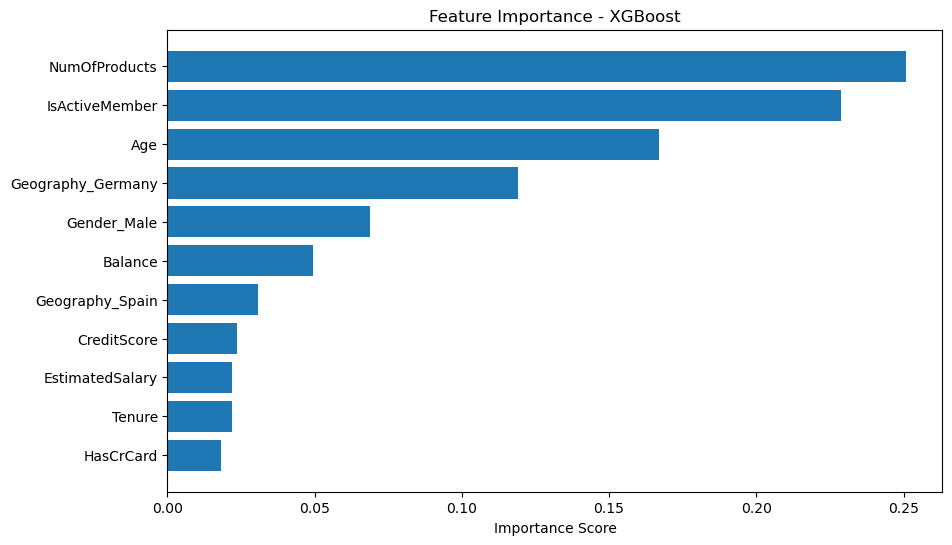

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance
importance = xgb_model.feature_importances_
feature_names = X_train.columns

# Create dataframe
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_importance['Feature'], feat_importance['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.show()


## Key Insights from Feature Importance

The model indicates that the number of products a customer holds 
is the strongest predictor of churn.

Customer activity status is also highly influential, suggesting that 
inactive customers are significantly more likely to leave.

Age appears to play an important role, indicating churn behaviour 
varies across age groups.

Geography (especially Germany) also shows a meaningful impact, 
suggesting regional differences in customer retention.

These insights provide actionable business intelligence beyond prediction.


## ROC-AUC Evaluation

Beyond accuracy, we evaluate the model using ROC-AUC score 
to measure its ability to distinguish between churned and 
non-churned customers across different probability thresholds.

A higher AUC indicates stronger classification performance.


ROC-AUC Score: 0.8708782030271508


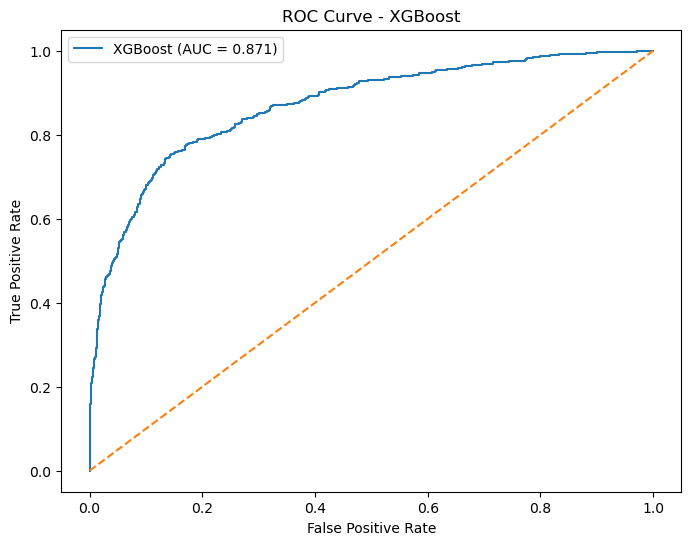

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get probability predictions
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob_xgb)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_xgb)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()


## ROC-AUC Interpretation

The XGBoost model achieved an ROC-AUC score of approximately 0.87, 
indicating strong ability to distinguish between churned and retained customers.

This confirms that the model performs well not only at a fixed threshold 
(accuracy) but across varying decision thresholds, making it reliable 
for real-world deployment scenarios.


In [33]:
import pandas as pd

comparison = pd.DataFrame({
    "Model": ["Logistic (Baseline)", "Logistic (Balanced)", "Random Forest", "XGBoost"],
    "Accuracy": [
        0.811,
        0.719,
        0.869,
        0.868
    ],
    "Recall (Churn)": [
        0.20,
        0.71,
        0.47,
        0.50
    ],
    "F1-Score (Churn)": [
        0.29,
        0.50,
        0.59,
        0.60
    ],
    "ROC-AUC": [
        None,
        None,
        None,
        0.871
    ]
})

comparison


,Model,Accuracy,Recall (Churn),F1-Score (Churn),ROC-AUC
0,Logistic (Baseline),0.811,0.20,0.29,NaN
1,Logistic (Balanced),0.719,0.71,0.50,NaN
2,Random Forest,0.869,0.47,0.59,NaN
3,XGBoost,0.868,0.50,0.60,0.871


## Model Comparison Summary

Comparing multiple models highlights the trade-offs between accuracy and churn detection.

While Logistic Regression struggled with minority class detection,
balanced Logistic improved recall significantly.

Random Forest improved overall performance,
but XGBoost achieved the best balance between accuracy and churn detection,
making it the final selected model.


In [34]:
import numpy as np
from sklearn.metrics import classification_report

threshold = 0.3  # Lower than 0.5

y_prob = xgb_model.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_prob > threshold).astype(int)

print(classification_report(y_test, y_pred_adjusted))


              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1607
           1       0.61      0.69      0.65       393

    accuracy                           0.85      2000
   macro avg       0.77      0.79      0.78      2000
weighted avg       0.86      0.85      0.86      2000



## Threshold Optimization

Instead of using the default 0.5 probability threshold,
we adjusted the threshold to 0.3 to increase churn detection.

Lowering the threshold increases recall,
allowing the bank to identify more at-risk customers,
at the cost of more false positives.

This trade-off is acceptable in churn prediction,
where missing a churned customer is more costly than a false alert.


## Strategic Business Recommendations

Based on the analysis and model findings:

- Target inactive customers with engagement campaigns.
- Focus retention efforts on customers holding only 1 product.
- Prioritize churn prevention strategies in Germany.
- Develop tailored offerings for customers above 40 years of age.
- Use adjusted probability thresholds in retention campaigns to maximize churn capture.

Implementing these strategies could significantly reduce customer attrition and improve lifetime value.


## Final Project Summary

This project delivers an end-to-end machine learning solution for predicting customer churn in a banking environment, combining statistical modeling with practical business strategy.

The workflow included:

- Exploratory Data Analysis to identify churn drivers  
- Feature engineering and encoding for model readiness  
- Handling class imbalance in minority churn detection  
- Comparative evaluation of Logistic Regression, Random Forest, and XGBoost  
- ROC-AUC analysis for threshold-independent performance measurement  
- Threshold optimization to improve churn recall  
- Feature importance interpretation for actionable business insights  

Among the models tested, XGBoost delivered the strongest overall performance (ROC-AUC ≈ 0.87), achieving a strong balance between accuracy and churn detection capability.

By adjusting the decision threshold from 0.5 to 0.3, recall for churned customers improved significantly — demonstrating how model outputs can be strategically tuned based on business cost considerations.

This project demonstrates not only predictive modeling skills, but also the ability to translate machine learning outputs into retention strategy recommendations.
